Shrinivas Gollalappa Kadaganchi

700750193

sxk01930@ucmo.edu

CS5700

Github Link:- https://github.com/shrinivas1881/AI.git

Introduction

Implement a CSP algorithm to solve two popular problems: Sudoku and map coloring. You
might want to go over the CSP lecture notes.

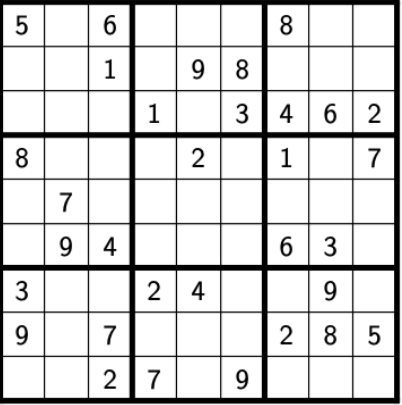


**Exercise 1**

Implement a CSP algorithm to solve the Sudoku puzzle that is shared in Figure 1.

The rules of the Sudoku puzzle:

• The Sudoku board is a 9x9 grid, divided into 9 3x3 subgrids.

• Each cell in the grid must be filled with a number from 1 to 9.

• No number can be repeated in any row, column, or subgrid.

You should follow some rules while implementing the algorithm:

• Your implementation should collect the input from the user as shown below.

• Your implementation should calculate the missing squares and print out the completed
board as the output.

• Include comments and clear documentation in your code for clarity.

• Ensure that your code is well-structured and follows best coding practices.

Sample input:

. . . 4 . 6 . . 3

. . 1 . . . . 6 .

. 6 . . . . . 1 .

3 . . . . 1 . . 6

. . . 1 . . . . 7

6 . . . . 4 . . .

. . . . . . . . 2

. . 9 . . . . . 6

1 . . . . . 5 . .

Here is an example of another solved Sudoku board:

5 3 4 6 7 8 9 1 2

6 7 2 1 9 5 3 4 8

1 9 8 3 4 2 5 6 7

8 5 9 7 6 1 4 2 3

4 2 6 8 1 3 7 5 9

7 1 3 9 2 5 6 8 4

9 8 7 6 5 4 2 3 1

2 6 3 4 8 9 1 7 5

3 4 1 5 9 7 8 6 2


In [28]:
# Import all the required libraries

import constraint

#Create the list of entire 81 variables, initialised to an empty set
boxes = []

for i in 'A B C D E F G H I'.split():
    k = []
    for j in range(1,10):
        k.append(i+str(j))
    boxes.append(k)


#Create a new constraint Problem
problem = constraint.Problem()

#Adding the 'AllDifferent' constraint to the given set of variables
def enforceUniqueValues(list_variables):
        problem.addConstraint(constraint.AllDifferentConstraint(), list_variables)

#Adding all the variables and their possible valid range to the problem
for row in boxes:
        problem.addVariables(row, range(1,10))

# enforce unique values in every row
for row in boxes:
        enforceUniqueValues(row)

# enforce unique values in every column
for column in zip(*boxes):
        enforceUniqueValues(column)


# enforce unique value in each small square
for n in range(1,10):
    small_square = []
    for j in range(3):
      small_square.extend(boxes[((n - 1) // 3) * 3 + j][((n - 1) % 3) * 3 : ((n - 1) % 3) * 3 + 3])
    enforceUniqueValues(small_square)

def solve(matrix):
    for index, val in enumerate(sum(matrix, [])):
        if val is not None:
            # Adjust the division and indexing as described above
            row_index = index // 9
            col_index = index % 9
            problem.addConstraint(lambda var, val=val: var == int(val), variables=[boxes[row_index][col_index]])


    #Find the solution
    soln = problem.getSolution()

    if soln is None:
        print("The given Sudoku is not solvable!")

    # Print the solved Sudoku without lists and commas
    for row in range(9):
        print(" ".join(map(str, [soln[boxes[row][col]] for col in range(9)])))


# Define the Sudoku puzzle as a string
sudoku = '''
5 . 6  . . .  8 . .
. . 1  . 9 8  . . .
. . .  1 . 3  4 6 2
8 . .  . 2 .  1 . 7
. 7 .  . . .  . . .
. 9 4  . . .  6 3 .
3 . .  2 4 .  . 9 .
9 . 7  . . .  2 8 5
. . 2  7 . 9  . . .
'''


# Function to convert Sudoku string to a matrix
def sudoku_to_matrix(s):
    m = []
    for line in s.split('\n'):
        if len(line) == 0:
            continue
        line = line.split()
        for (i, token) in enumerate(line):
            if token == '.':
                line[i] = None
        m.append(line)
    return m

# Solve and print the Sudoku puzzle
solve(sudoku_to_matrix(sudoku))

5 3 6 4 7 2 8 1 9
4 2 1 6 9 8 5 7 3
7 8 9 1 5 3 4 6 2
8 6 3 9 2 4 1 5 7
1 7 5 8 3 6 9 2 4
2 9 4 5 1 7 6 3 8
3 1 8 2 4 5 7 9 6
9 4 7 3 6 1 2 8 5
6 5 2 7 8 9 3 4 1


Exercise 2

You’ll exercise the map coloring problem through U.S. state graph that is shared in Figure 2.
You are allowed to use the colors: R, G, B, and Y. No adjacent states will be in the same color.
Please show me the steps in your solution and the Final mapping in the output screen.

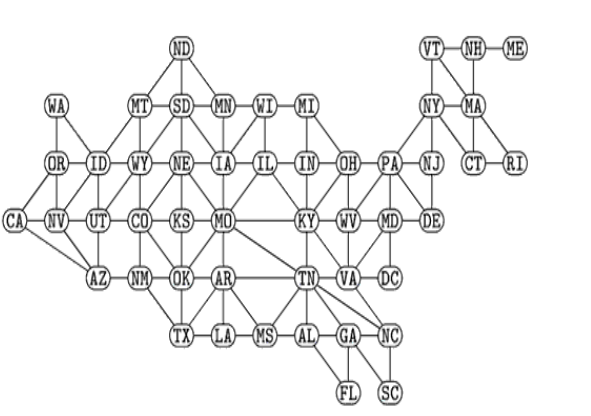

• You can start from any state that you prefer and keep going until all of the states have
been colored.

• No two adjacent states will be in the same color.

• Include comments and clear documentation in your code for clarity.

• Ensure that your code is well-structured and follows best coding practices.

In [29]:
# Define a dictionary that represents the neighbors of U.S. states
us_neighbors = {
    "ND": ["MT", "SD", "MN"],
    "VT": ["NY", "MA", "NH"],
    "NH": ["VT","MA","ME"],
	"ME": ["NH"],
	"WA": ["OR","ID"],
	"MT": ["ND", "ID", "SD", "WY"],
	"SD": ["ND", "MN", "MT", "WY", "NE", "IA"],
	"MN": ["ND","SD", "WI", "IA"],
	"WI": ["MN", "MI", "IA", "IL" ],
	"MI": ["WI", "IN", "OH"],
	"NY": ["VT", "MA", "PA", "NJ", "CT"],
	"MA": ["VT", "NH", "NY", "CT", "RI"],
	"OR": ["WA","ID","NV", "CA"],
	"ID": ["WA","MT", "OR", "WY", "NV", "UT"],
	"WY": ["MT", "SD", "ID", "NE", "UT", "CO"],
	"NE": ["SD","WY", "IA", "CO","KS", "MO"],
	"IA": ["SD", "MN", "WI", "NE", "IL", "MO"],
	"IL": ["WI", "IA", "IN", "MO", "KY" ],
	"IN": ["MI", "IL", "OH", "KY"],
	"OH": ["MI", "IN", "PA", "KY", "WV"],
	"PA": ["NY", "OH", "NJ", "WV", "MD", "DE"],
	"NJ": ["NY", "PA", "DE"],
	"CT": ["NY", "MA", "RI"],
	"RI": ["MA", "CT"],
	"CA": ["OR", "NV", "AZ"],
	"NV": ["OR", "ID", "CA", "UT", "AZ"],
	"UT": ["ID","WY", "NV", "CO", "AZ"],
	"CO": ["WY", "NE", "UT", "KS", "NM", "OK"],
	"KS": ["NE", "CO", "MO", "OK"],
	"MO": ["NE", "IA", "IL", "KS", "KY", "OK", "AR", "TN"],
	"KY": ["IL", "IN", "OH", "MO", "WV", "TN", "VA"],
	"WV": ["OH", "PA", "KY", "MD", "VA"],
	"MD": ["PA", "WV", "DE", "VA", "DC"],
	"DE": ["NJ", "PA", "MD"],
	"AZ": ["CA", "NV", "UT", "NM"],
	"NM": ["CO", "AZ", "OK", "TX"],
	"OK": ["CO", "KS", "MO", "NM", "AR", "TX"],
	"AR": ["MO", "OK", "TN", "TX", "LA", "MS"],
	"TN": ["MO", "KY", "AR", "VA", "MS", "AL", "GA", "NC"],
	"VA": ["KY", "WV", "MD", "TN", "DC", "NC"],
	"DC": ["MD","VA"],
	"TX": ["NM", "AR", "OK", "LA"],
	"LA": ["AR", "TX", "MS"],
	"MS": ["AR", "TN", "LA", "AL"],
	"AL": ["TN", "MS", "GA", "FL"],
	"GA": ["TN", "AL", "NC", "FL", "SC"],
	"NC": ["TN", "VA", "GA", "SC"],
	"FL": ["AL", "GA"],
	"SC": ["GA", "NC"]
    # ... Define neighbors for all states
}
# Create an empty list to store neighbor state pairs
neighbourstate = []

# Iterate through the dictionary to extract neighbor state pairs
for keys, item in us_neighbors.items():
    for state in item:
        neighbor = []
        neighbor.extend([keys, state])
        neighbourstate.append(neighbor)

# Define a function to remove duplicate entries in a 2D list
def remove_duplicates_2d(lst_2d):
    seen = set()
    unique_list = []

    # Iterate through the 2D list
    for sub_list in lst_2d:
        # Convert each sub-list to a frozenset to make it hashable
        frozen_sub = frozenset(sub_list)

        # Check if the frozenset has been seen before (indicating a duplicate)
        if frozen_sub not in seen:
            # Convert the frozenset back to a list and add it to the unique list
            unique_list.append(list(frozen_sub))
            seen.add(frozen_sub)

    return unique_list

# Example usage:
my_2d_list = neighbourstate

# Call the function to remove duplicate neighbor state pairs
unique_list_of_neighbor = remove_duplicates_2d(my_2d_list)

# The result is unique pairs of neighboring states in `unique_list_of_neighbor`


In [30]:
# Import all the required libraries
from typing import Generic, TypeVar, Dict, List, Optional
from abc import ABC, abstractmethod
import pandas as pd

V = TypeVar('V') # variable type
D = TypeVar('D') # domain type
# Base class for all constraints
class Constraint(Generic[V, D], ABC):
    # The variables that the constraint is between
    def __init__(self, variables: List[V]) -> None:
        self.variables = variables
    # Must be overridden by subclasses
    @abstractmethod
    def satisfied(self, assignment: Dict[V, D]) -> bool:
        ...

# A constraint satisfaction problem consists of variables of type V
# that have ranges of values known as domains of type D and constraints
# that determine whether a particular variable's domain selection is valid
class CSP(Generic[V, D]):
    def __init__(self, variables: List[V], domains: Dict[V, List[D]]) -> None:
        self.variables: List[V] = variables # variables to be constrained
        self.domains: Dict[V, List[D]] = domains # domain of each variable
        self.constraints: Dict[V, List[Constraint[V, D]]] = {}
        for variable in self.variables:
            self.constraints[variable] = []
            if variable not in self.domains:
                raise LookupError("Every variable should have a domain assigned to it.")
    def add_constraint(self, constraint: Constraint[V, D]) -> None:
        for variable in constraint.variables:
            if variable not in self.variables:
                raise LookupError("Variable in constraint not in CSP")
            else:
                self.constraints[variable].append(constraint)

   # Check if the value assignment is consistent by checking all constraints
   # for the given variable against it
    def consistent(self, variable: V, assignment: Dict[V, D]) -> bool:
      for constraint in self.constraints[variable]:
        if not constraint.satisfied(assignment):
          return False
      return True

    def backtracking_search(self, assignment: Dict[V, D] = {}) -> Optional[Dict[V, D]]:
      # assignment is complete if every variable is assigned (our base case)
      if len(assignment) == len(self.variables):
        return assignment
      # get all variables in the CSP but not in the assignment
      unassigned: List[V] = [v for v in self.variables if v not in assignment]
      # get the every possible domain value of the first unassigned variable
      first: V = unassigned[0]
      for value in self.domains[first]:
        local_assignment = assignment.copy()
        local_assignment[first] = value
        # if we're still consistent, we recurse (continue)
        if self.consistent(first, local_assignment):
            result: Optional[Dict[V, D]] = self.backtracking_search(local_assignment)
            # if we didn't find the result, we will end up backtracking
            if result is not None:
                return result
      return None

# Define a constraint for map coloring
class MapColoringConstraint(Constraint[str, str]):
    def __init__(self, place1: str, place2: str) -> None:
        super().__init__([place1, place2])
        self.place1: str = place1
        self.place2: str = place2
    def satisfied(self, assignment: Dict[str, str]) -> bool:
        # If either place is not in the assignment then it is not
        # yet possible for their colors to be conflicting
        if self.place1 not in assignment or self.place2 not in assignment:
          return True
        # check the color assigned to place1 is not the same as the color assigned to place2
        return assignment[self.place1] != assignment[self.place2]

if __name__ == "__main__":
    # Define the list of U.S. states and their possible colors
    variables: List[str] = [
    "ND", "VT", "NH", "ME",
	"WA", "MT", "SD", "MN", "WI", "MI", "NY", "MA",
	"OR", "ID", "WY", "NE", "IA", "IL", "IN", "OH", "PA", "NJ", "CT", "RI",
	"CA", "NV", "UT", "CO", "KS", "MO", "KY", "WV", "MD", "DE",
	"AZ", "NM", "OK", "AR", "TN", "VA", "DC",
    "TX", "LA", "MS", "AL", "GA", "NC",
    "FL", "SC"	]
    domains: Dict[str, List[str]] = {}
    for variable in variables:
        domains[variable] = ['R', 'G', 'B', 'Y']

    # Create a CSP instance
    csp: CSP[str, str] = CSP(variables, domains)

 # Add map coloring constraints based on neighbor information
    for neighbor_list in unique_list_of_neighbor:
      #print(neighbor_list[0], neighbor_list[1])
      csp.add_constraint(MapColoringConstraint(neighbor_list[0], neighbor_list[1]))

# Solve the CSP using backtracking search
solution: Optional[Dict[str, str]] = csp.backtracking_search()

# Print the solution if found, or indicate no solution
if solution is None:
    print("No solution found!")
else:
    # Convert the solution to a DataFrame for better visualization
    state_coloring=pd.DataFrame.from_dict(solution, orient='index')
    print(state_coloring)



    0
ND  R
VT  R
NH  G
ME  R
WA  R
MT  G
SD  B
MN  G
WI  R
MI  G
NY  G
MA  B
OR  G
ID  B
WY  R
NE  G
IA  Y
IL  G
IN  R
OH  B
PA  R
NJ  B
CT  R
RI  G
CA  R
NV  Y
UT  G
CO  B
KS  R
MO  B
KY  Y
WV  G
MD  B
DE  G
AZ  B
NM  R
OK  G
AR  R
TN  G
VA  R
DC  G
TX  B
LA  G
MS  B
AL  R
GA  B
NC  Y
FL  G
SC  R
